# Exploring ACIS / PRISM weather data and GDU curves

In this notebook we will download ACIS / PRISM gridded weather data and use it to compute GDU curves at a specific field. It is the start of a data processing scheme that brings insight into field state and operational planning.

Let us begin by importing some useful libraries that will be used throughout the notebook. Those are:
1. requests: Makes HTTP requests. We will use it to grab data from ACIS.
2. pandas: A popular tool for doing data analysis in python. We will use it for just about everything :).
3. matplotlib: A tool for making graphical plots. We will use it to, well, make plots!

_Note:_ I set the matplotlib style to “seaborn-colorblind” because I like it better. It is not required and your welcome to adjust it to your liking.

In [1]:
import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt # This is just so we don't have to type "matplotlib.pyplot" all the time.

plt.style.use('seaborn-colorblind')

Let us start by grabbing some ACIS weather data for a field at Purdue's [ACRE farm](https://www.google.com/maps/place/40%C2%B028'27.2%22N+86%C2%B059'43.7%22W/@40.4742259,-86.9975974,1242m/data=!3m1!1e3!4m5!3m4!1s0x0:0x0!8m2!3d40.4742222!4d-86.9954722). That is GPS coordinate: (40.4742259,-86.9975974).

We will grab all the _historical_ data that ACIS/PRISM has available. Let's ignore _this_ years data for now (because it is incomplete).

It is okay if you don't understand all this code right now. We will spend some time getting used to Python/Pandas before we compute the GDU curves.

In [2]:
# GPS coordinates of interest
lat = 40.4742259
lon = -86.9975974

# PRISM usally goes back to 1981
sdate = "1981-01-01"
edate = "2019-12-31"

# Make ACIS API request
w = requests.post('http://data.rcc-acis.org/GridData', json={
    "loc": f"{lon}, {lat}",
    "sdate": sdate,
    "edate": edate,
    "grid": "21",   # "21" is PRISM
    "elems": [
        { "name":"maxt", "interval":"dly", "units":"degreeF" },
        { "name":"mint", "interval":"dly", "units":"degreeF" },
        { "name":"pcpn", "interval":"dly", "units":"inch" }
    ]
})

# Parse the JSON response to a Python datatypes
w = w.json()

# Convert the raw Python map to a Pandas DataFrame
w = pd.DataFrame(w['data'], columns=['date', 'maxt', 'mint', 'pcpn'])

# Convert the date "string" into a real Pandas date object (enables some Pandas niceties)
w['date'] = pd.to_datetime(w['date'])

# Tell Pandas to use the "date" columns as the index. Basically this means it will be easy 
# to select data from the DataFrame by date and date range.
w.set_index('date', inplace=True)

# Getting comfortable with Pandas

In [3]:
# Print the first few rows of the DataFrame 
w.head()

,maxt,mint,pcpn
date,,,
1981-01-01,34,30,0.0
1981-01-02,33,18,0.0
1981-01-03,32,18,0.0
1981-01-04,24,-2,0.0
1981-01-05,13,-3,0.0


In [4]:
# Print the last few rows of the DataFrame
w.tail()

,maxt,mint,pcpn
date,,,
2019-12-27,63,38,0.00
2019-12-28,39,32,0.00
2019-12-29,58,35,0.42
2019-12-30,60,36,0.85
2019-12-31,36,30,0.00


In [5]:
# Look at the column wise statistics of the DataFrame
w.describe()

,maxt,mint,pcpn
count,14244.000000,14244.000000,14244.000000
mean,61.274712,41.181761,0.107535
std,21.045012,18.994300,0.290945
min,-11.000000,-24.000000,0.000000
25%,44.000000,28.000000,0.000000
50%,64.000000,42.000000,0.000000
75%,80.000000,57.000000,0.050000
max,103.000000,77.000000,4.490000


In [6]:
# Select a certain column of the DataFrame
w['maxt']

date
1981-01-01    34
1981-01-02    33
1981-01-03    32
1981-01-04    24
1981-01-05    13
              ..
2019-12-27    63
2019-12-28    39
2019-12-29    58
2019-12-30    60
2019-12-31    36
Name: maxt, Length: 14244, dtype: int64

In [7]:
# Select rows by row number
w[36:39]

,maxt,mint,pcpn
date,,,
1981-02-06,28,2,0.0
1981-02-07,33,22,0.0
1981-02-08,39,10,0.0


In [8]:
# Select rows by index (date)
w['2002-02-01':'2002-04-15']

,maxt,mint,pcpn
date,,,
2002-02-01,52,32,0.59
2002-02-02,34,21,0.00
2002-02-03,37,21,0.00
2002-02-04,42,17,0.00
2002-02-05,29,13,0.00
...,...,...,...
2002-04-11,64,38,0.00
2002-04-12,76,50,0.32
2002-04-13,72,50,0.69


In [9]:
# Select a specific column for rows by index (date)
w['2002-02-01':'2002-04-15']['maxt']

date
2002-02-01    52
2002-02-02    34
2002-02-03    37
2002-02-04    42
2002-02-05    29
              ..
2002-04-11    64
2002-04-12    76
2002-04-13    72
2002-04-14    64
2002-04-15    75
Name: maxt, Length: 74, dtype: int64

In [10]:
# We can even get multiple columns at once
w['2002-02-01':'2002-04-15'][ ['maxt', 'mint'] ]

,maxt,mint
date,,
2002-02-01,52,32
2002-02-02,34,21
2002-02-03,37,21
2002-02-04,42,17
2002-02-05,29,13
...,...,...
2002-04-11,64,38
2002-04-12,76,50
2002-04-13,72,50


# Getting comfortable with Matplotlib

<IPython.core.display.Javascript object>


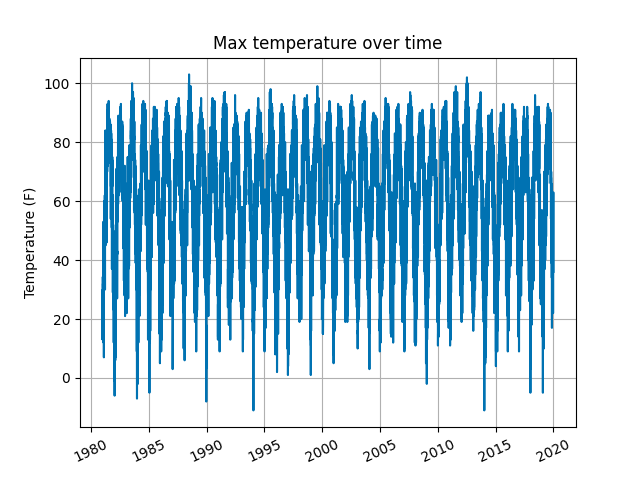

(array([720989., 722815., 724642., 726468., 728294., 730120., 731947.,
        733773., 735599., 737425., 739252.]),
 <a list of 11 Text major ticklabel objects>)

In [14]:
# Note, the "%" operator is specific to this Python environment (Jupyter Notebook) and is not Python code.
# This line in particular tells the notebook to display the plot with "notebook" interactivity.
%matplotlib notebook

# Matplotlib combined with Pandas makes plotting really easy!
plt.plot(w.maxt)
# Note: Matplotlib was able to determine the correct x-axis based on the DataFrame's index (in this case, date)

# We can improve the plot by adding a grid, labels, title, and tick rotation (the date strings are long)
plt.grid()
plt.ylabel('Temperature (F)')
plt.title('Max temperature over time')
plt.xticks(rotation=25)

## Ploting only 2019 data

#### A single figure image

<IPython.core.display.Javascript object>


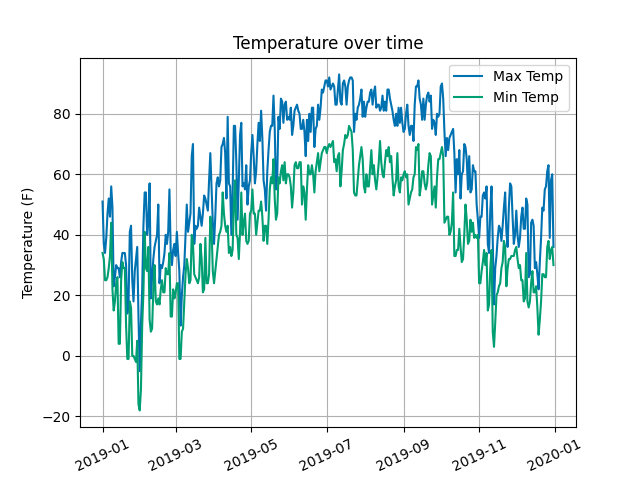

(array([737060., 737119., 737180., 737241., 737303., 737364., 737425.]),
 <a list of 7 Text major ticklabel objects>)

In [19]:
%matplotlib notebook

# We store the slice into 'w' as w_19 for convenience (we will use it several times)
w19 = w['2019-01-01':'2019-12-31'];

# Calling `plot` multiple times add additional lines to the same figure
plt.plot(w19.maxt)
plt.plot(w19.mint)

# Dress up the figure in our standard way
plt.grid()
# Add a legend to distinguish between the two curves
plt.legend(['Max Temp', 'Min Temp'])
plt.ylabel('Temperature (F)')
plt.title('Temperature over time')
plt.xticks(rotation=25)

#### Two figures, ones image

<IPython.core.display.Javascript object>


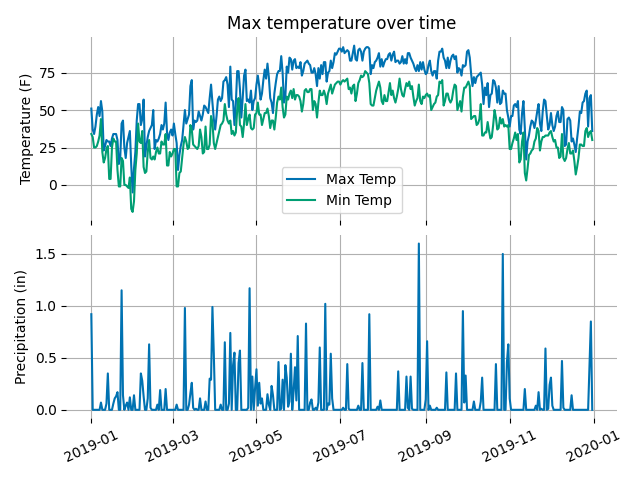

In [25]:
%matplotlib notebook

### Put two plots on one figure

# The `subplot` command allows us to slice up one image and draw multiple independent figures into each slice
# In this case, we are slicing the image into 2 rows and 1 column. We select the first slice.
# We also turn the "frame" (outside border of image) off -- style preference.
ax = plt.subplot(2, 1, 1, frameon=False)
plt.plot(w19.maxt)
plt.plot(w19.mint)

# Dress up the figure in our standard way
plt.grid()
plt.legend(['Max Temp', 'Min Temp'])
plt.ylabel('Temperature (F)')
plt.title('Max temperature over time')
# This fancy calls turns off the x axis tick labels -- style preference.
plt.setp(ax.get_xticklabels(), visible=False)

# Now we select the second slice. Notice we share the x-axis. This is so when you interact with the either plot
# the other plot is automatically adjusted to the same scale.
plt.subplot(2, 1, 2, sharex=ax, frameon=False)
plt.plot(w19.pcpn)

plt.grid()
plt.ylabel('Precipitation (in)')
plt.xticks(rotation=25)

# A "tight layout" just reduces the amount of white space in the figure. A bit noisier but also larger plots.
plt.tight_layout()

## Grouping and reducing

In Pandas, you can group a DataFrame by a field or condition and then apply an operation to each group. The output is a new DataFrame indexed by the "group by" output and values equal to the return of each groups operation.

It turns out this is _extremely_ useful and reduces the amount of code needed to implement many tasks by a significant margin.

In [26]:
# A "Group By" is a DataFrame that contains a set of DataFrames such that all elements of one set share the 
# group by'd value. Pandas has many functions to reduce this set into a single DataFrame indexed by the group by'd
# column/value pair.

# Group the full data set by the year
byYear = w.groupby(w.index.year)

byYear.describe().head()

maxt                                                       mint  \
      count       mean        std  min   25%   50%   75%    max  count   
date                                                                     
1981  365.0  60.010959  20.632975  7.0  42.0  63.0  78.0   94.0  365.0   
1982  365.0  59.484932  22.035509 -6.0  42.0  64.0  78.0   93.0  365.0   
1983  365.0  61.071233  23.010995 -7.0  42.0  63.0  81.0  100.0  365.0   
1984  366.0  60.000000  21.168987 -2.0  43.0  62.0  79.0   94.0  366.0   
1985  365.0  60.213699  22.609765 -5.0  43.0  66.0  80.0   92.0  365.0   

                 ...               pcpn                                     \
           mean  ...   75%   max  count      mean       std  min  25%  50%   
date             ...                                                         
1981  40.232877  ...  57.0  75.0  365.0  0.118055  0.328555  0.0  0.0  0.0   
1982  39.693151  ...  56.0  73.0  365.0  0.110795  0.276830  0.0  0.0  0.0   
1983  41.580822  ...  57.0  75.0  365.0  0.091425  0.284456  0.0  0.0  0.0   
1984  40.909836  ...  57.0  75.0  366.0  0.089891  0.245628  0.0  0.0  0.0   
1985  40.046575  ...  57.0  73.0  365.0  0.105644  0.282580  0.0  0.0  0.0   

                  
       75%   max  
date              
1981  0.04  3.74  
1982  0.04  2.15  
1983  0.05  3.08  
1984  0.04  2.13  
1985  0.05  2.15  

[5 rows x 24 columns]

In [28]:
# You can then call a reducer method on the "GroupBy" and produce the new DataFrame

# For example, here the 'median' function computes the median for each column by year
# and returns them a DataFrame
byYear.median().head()

,maxt,mint,pcpn
date,,,
1981,63.0,42.0,0.0
1982,64.0,43.0,0.0
1983,63.0,42.0,0.0
1984,62.0,41.0,0.0
1985,66.0,44.0,0.0


<IPython.core.display.Javascript object>


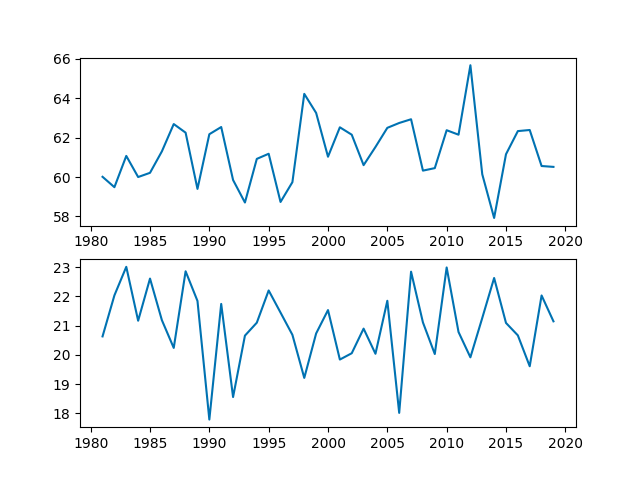

In [30]:
%matplotlib notebook

# You can select a column out of the "GroupBy" before processing them
# You can use the result DataFrame just like before, e.g., plotting.

plt.subplot(2, 1, 1)
plt.plot(byYear['maxt'].mean())
plt.subplot(2, 1, 2)
plt.plot(byYear['maxt'].std())

In [33]:
# Datetime indexes have several of useful built-in features that make date based grouping easier.

# For our GDU work, we will want to look at the weather of all historical years on a given day. 
# That is, we want to group by the date's "day of year" number

byDay = w.groupby(w.index.dayofyear)

meanByDay = byDay.mean()

# If we are going to keep the variable around, we can rename the index so the output is more meaningful
meanByDay.index.rename("DoY", inplace=True)

# We will consistently be tripped up by the fact that some years have 365 days and other 366.
# For our purposes, GDU's accumulated at end of the year won't be of interest, so we just throw away the 366-th
# day to ensure we always have 365 entries.
meanByDay = meanByDay[0:365]

meanByDay.tail()

,maxt,mint,pcpn
DoY,,,
361,33.615385,17.794872,0.085641
362,35.974359,21.333333,0.116923
363,38.615385,20.358974,0.185128
364,35.717949,20.923077,0.073590
365,35.589744,20.179487,0.096923


#### Combining all the above

<IPython.core.display.Javascript object>


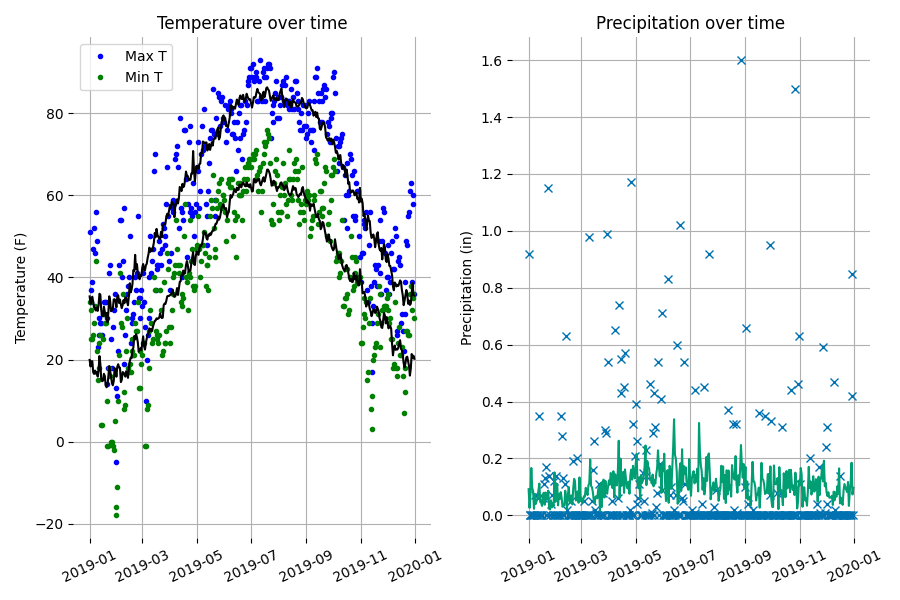

In [84]:
%matplotlib notebook

# Before we move on, let us work through an example of a more complicated plot that takes advantage of all
# the tools we have learned so far. We will also explore line styles.

# Let's add the typical (average) min and max temp and precipitation to the plot from before

# This time around our data is indexed by "day of year". This Pandas date range will help make plotting 
# the x-axis a little simpler.
y19 = pd.date_range('2019-01-01', periods=365)

# This time, lets do 1 row and 2 columns.
plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 2, 1, frameon=False)
plt.plot(w19.maxt, 'b.')
plt.plot(w19.mint, 'g.')
plt.plot(y19, meanByDay.maxt, 'k')
plt.plot(y19, meanByDay.mint, 'k')

plt.grid()
plt.legend(['Max T', 'Min T'])
plt.ylabel('Temperature (F)')
plt.title('Temperature over time')
plt.xticks(rotation=25)

# Now plot the precipitation data
plt.subplot(1, 2, 2, sharex=ax, frameon=False)
plt.plot(w19.pcpn, 'x')
plt.plot(y19, meanByDay.pcpn)

plt.grid()
plt.ylabel('Precipitation (in)')
plt.title('Precipitation over time')
plt.xticks(rotation=25)

plt.tight_layout()

# Growing Degree Units
## Computing GDUs for an ACRE field using public ACIS/PRISM gridded weather data

Let's start by simply plotting this year's current GDU curve.

We didn't fetch 2020 weather data in our earlier request to ACIS. So, here we use the same code with new date ranges to download up to 2020-07-01 (today's date as of this writing). Just like before, we finish up by converting the fetched data into a Pandas DataFrame.

In [52]:
sdate_2020 = "2020-01-01"
edate_2020 = "2020-07-01"

# ACIS 
w_field = requests.post('http://data.rcc-acis.org/GridData', json={
    "loc": f"{lon}, {lat}",
    "sdate": sdate_2020,
    "edate": edate_2020,
    "grid": "21",   # "21" is PRISM
    "elems": [
        { "name":"maxt", "interval":"dly", "units":"degreeF" },
        { "name":"mint", "interval":"dly", "units":"degreeF" },
        { "name":"pcpn", "interval":"dly", "units":"inch" }
    ]
}).json()

# Create a Pandas DataFrame to hold the min and max temperature and precipitation data
w_field = pd.DataFrame(w_field['data'], columns=['date', 'maxt', 'mint', 'pcpn'])
# Convert the date "string" into a date object (so Pandas understands it as a date)
w_field['date'] = pd.to_datetime(w_field['date'])
# Then make it the primary index so we can easily slice the data up by time
w_field.set_index('date', inplace=True)

w_field.head()

,maxt,mint,pcpn
date,,,
2020-01-01,33,27,0.0
2020-01-02,45,27,0.0
2020-01-03,51,38,0.0
2020-01-04,43,33,0.0
2020-01-05,35,25,0.0


### Planting records
Let's also note the planting records for this field.

- The field was (hypothetically) planted with Dekalb DKC64-35RIB.
- The manufacture claims 2954 to black layer ([Dekalb DKC64-35RIB Datasheet](https://cdn.websites.hibu.com/f091a3ebdd4e480a8da11c597fdbfb00/files/uploaded/DKC64-35RIB.pdf)).
- The field was (hypothetically) planted on April 4th, 2020.

In [58]:
plant_date = "2020-04-25"
gdu_to_black = 2594

## GDU accumulation from planting date

In [59]:
# We will use the "standard" corn 86/50 average value method
t_max = 86
t_base = 50

# "Modify" the temp data for corn's upper threshold max
w_field.loc[w_field.maxt > t_max, 'maxt'] = t_max

# Save the daily GDU totals back to the DataFrame as a new column
w_field['gdu'] = (w_field.maxt + w_field.mint) / 2 - t_base

# Negative GDUs are assumed to be zero ... that is a colder day doesn't reduce the growth
w_field.loc[w_field.gdu < 0, 'gdu'] = 0 

# Determine the total GDUs from the plant date
field_gdu = w_field[plant_date:].gdu.sum()

field_gdu

1092.0

## Estimating the current growth stage

In [61]:
# Note: these formals are fit from data found in the literature
V = 42 * (field_gdu / gdu_to_black) - 2.23
R = 10.3 * (field_gdu / gdu_to_black) - 4.37

# Note: A "negative" R indicates that the plant is not yet in the reproductive stage.
print(f"V: {V}, R: {R}")

V: 15.450801850424057, R: -0.03399383191981453


## Computing historical GDD curves

<IPython.core.display.Javascript object>


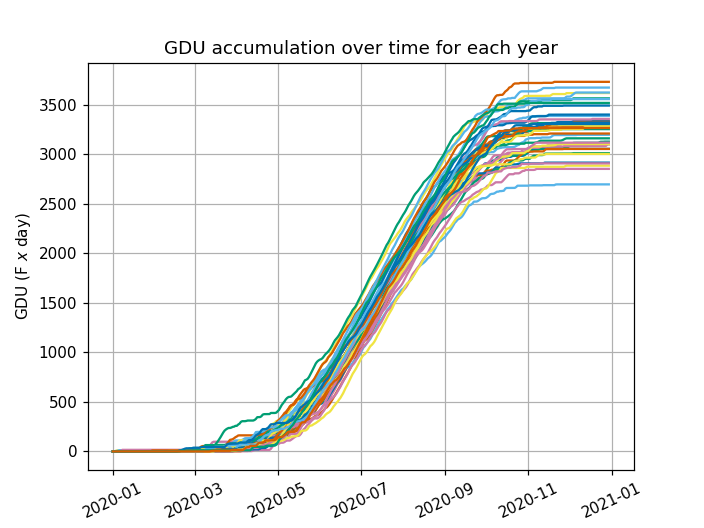

(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.]),
 <a list of 7 Text major ticklabel objects>)

In [80]:
%matplotlib notebook

# Like last time, let us save a helper date range for plotting "day of year" data
y20 = pd.date_range('2020-01-01', periods=365)

# Let us save a copy because we are going to "modify" the temperature data
w_corn = w.copy();

# "Modify" the temp curve for corn max
w_corn.loc[w_corn.maxt > t_max, 'maxt'] = t_max

w_corn['gdu'] = (w_corn.maxt + w_corn.mint) / 2 - t_base
w_corn.loc[w_corn.gdu < 0, 'gdu'] = 0

# The 'cumsum' function is "cumulative sum". That means the output of a 'cumsum' operation is a vector the
# same length as the input vector. However, the output vector is like:
#   index 0: equal to original value at index 0
#   index 1: equal to original value at index 0 + original value at index 1
#   index 2: equal to output at index 1 + original value at index 2
#   index 3: equal to output at index 2 + original value at index 3
#   index N: equal to output at index N-1 + original value at index N
#
# In this case, we are 'cumsum'ing down the GDUs, grouped by year. So we will end up with a DataFrame indexed by
# the same date column, however, 'gdu_accum' will be the running total of GDUs accumulated from the beginning of
# that year to the current date.
gdu_curve_by_year = w_corn.gdu.groupby(w_corn.index.year).cumsum()

# Now, we group by year again, looping over each year plotting a line at a time.
for year, gdu_curve  in gdu_curve_by_year.groupby(gdu_curve_by_year.index.year):
    # We only plot from 0:365 to avoid an x and y mismatch
    plt.plot(y20, gdu_curve[0:365], label=year)
    
plt.grid()
plt.ylabel('GDU (F $x$ day)')
plt.title('GDU accumulation over time for each year')
plt.xticks(rotation=25)
#plt.legend()

## Plot the min, max, and average curves

In [ ]:
%matplotlib notebook

crop_gdu = w_mod[]

min_gdu = w_mod.gdu_accum.groupby(w_mod.index.dayofyear).min()[0:365]
max_gdu = w_mod.gdu_accum.groupby(w_mod.index.dayofyear).max()[0:365]
avg_gdu = w_mod.gdu_accum.groupby(w_mod.index.dayofyear).mean()[0:365]

#plt.plot(y20, min_gdu, color='#bee3f8')
#plt.plot(y20, max_gdu, color='#bee3f8')
plt.fill_between(y20[y20 >= sdate], min_gdu, max_gdu, color='#bee3f8')
plt.plot(y20, avg_gdu, color='#2b6cb0')
plt.plot(y20[0:len(w20_mod.gdu_accum)], w20_mod.gdu_accum, color='#38a169')
plt.plot(y20[len(w20_mod.gdu_accum):-1], w20_mod.gdu_accum[-1] + avg_gdu[len(w20_mod.gdu_accum):-1] - avg_gdu[len(w20_mod.gdu_accum)])
plt.hlines((13 + 2.23) * gdu_to_black / 42, y20[0], y20[-1])

plt.grid()
plt.ylabel('GDU (F)')
plt.title('GDU Accumulations')
plt.xticks(rotation=25)



##### A LOT OF THIS NEEDS TO BE SHIFTED SO IT IS RELATIVE TO PLANT DATE !!!!
##### CAN WE EASILY SHOW THE "MIN/MAX" ERROR BOUND FROM CURRENT DATE???